A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

**The company wants to know:**

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

**Business Goal** 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [53]:
# Importing the relevant libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [54]:
print("\n")
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("sklearn: ",sklearn.__version__)
print("statsmodels: ",statsmodels.__version__)
print("scipy: ",scipy.__version__)



python:  3.11.5
numpy:  1.24.3
pandas:  2.0.3
matplotlib:  3.7.2
seaborn:  0.12.2
sklearn:  1.3.0
statsmodels:  0.14.0
scipy:  1.11.1


# Data exploration

In [2]:
# Reading the dataset
data = pd.read_csv("train.csv", na_values="NAN")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning


In [6]:
#missing values
nullvalue_percentage=pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullvalue_percentage.head(10)

,Null values in %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [7]:
#deleting first five columns in nullvalue_percentage dataframe
data=data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [8]:
#dropping ID column as well
data=data.drop('Id',axis=1)

In [9]:
#imputing missing values
null_columns=data.columns[data.isnull().any()]
for i in null_columns:
  print(i,data[i].isnull().sum())

LotFrontage 259
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [10]:
#median
def fill_na_with_median(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].median())

columns_to_fill = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
fill_na_with_median(data, columns_to_fill)

In [11]:
#mode
def fill_na_with_mode(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mode()[0])

columns_to_fill_mode = ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical')
fill_na_with_mode(data, columns_to_fill_mode)


In [12]:
data.shape

(1460, 75)

In [13]:
unique_sum ={column: np.sum(pd.Series(data[column]).nunique()) for column in data.columns}

sorted_uniques = dict(sorted(unique_sum.items(), key=lambda item: item[1]))

print(sorted_uniques)

{'Street': 2, 'Utilities': 2, 'CentralAir': 2, 'LandSlope': 3, 'MasVnrType': 3, 'BsmtHalfBath': 3, 'HalfBath': 3, 'GarageFinish': 3, 'PavedDrive': 3, 'LotShape': 4, 'LandContour': 4, 'ExterQual': 4, 'BsmtQual': 4, 'BsmtCond': 4, 'BsmtExposure': 4, 'BsmtFullBath': 4, 'FullBath': 4, 'KitchenAbvGr': 4, 'KitchenQual': 4, 'Fireplaces': 4, 'MSZoning': 5, 'LotConfig': 5, 'BldgType': 5, 'ExterCond': 5, 'HeatingQC': 5, 'Electrical': 5, 'GarageCars': 5, 'GarageQual': 5, 'GarageCond': 5, 'YrSold': 5, 'RoofStyle': 6, 'Foundation': 6, 'BsmtFinType1': 6, 'BsmtFinType2': 6, 'Heating': 6, 'GarageType': 6, 'SaleCondition': 6, 'Functional': 7, 'Condition2': 8, 'HouseStyle': 8, 'RoofMatl': 8, 'BedroomAbvGr': 8, 'PoolArea': 8, 'Condition1': 9, 'OverallCond': 9, 'SaleType': 9, 'OverallQual': 10, 'TotRmsAbvGrd': 12, 'MoSold': 12, 'MSSubClass': 15, 'Exterior1st': 15, 'Exterior2nd': 16, '3SsnPorch': 20, 'MiscVal': 21, 'LowQualFinSF': 24, 'Neighborhood': 25, 'YearRemodAdd': 61, 'ScreenPorch': 76, 'GarageYrBlt'

In [14]:
data.isnull().values.any()

False

# Data Visualisation

In [15]:
#plotting all numeric columns

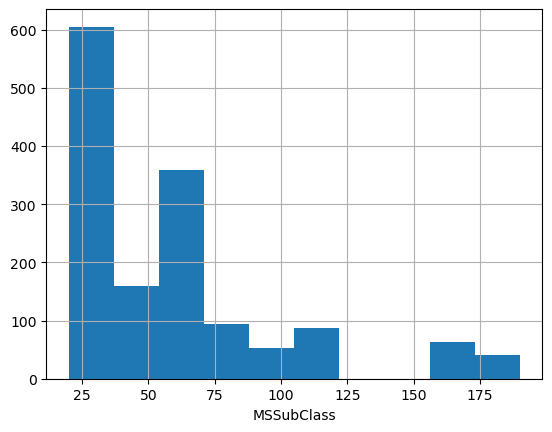

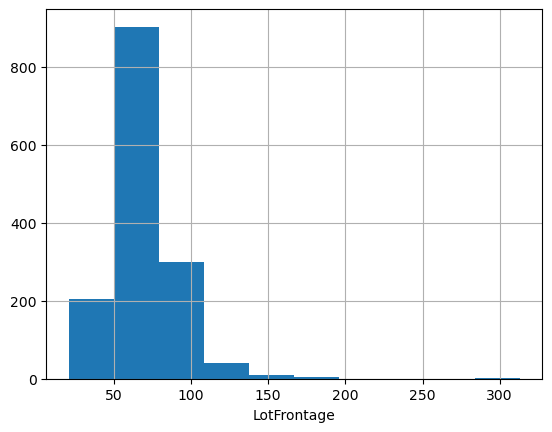

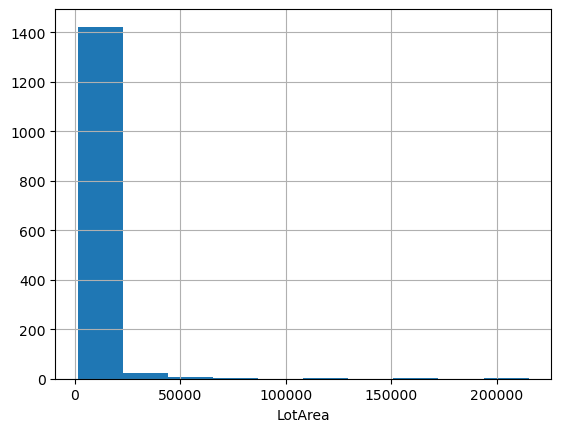

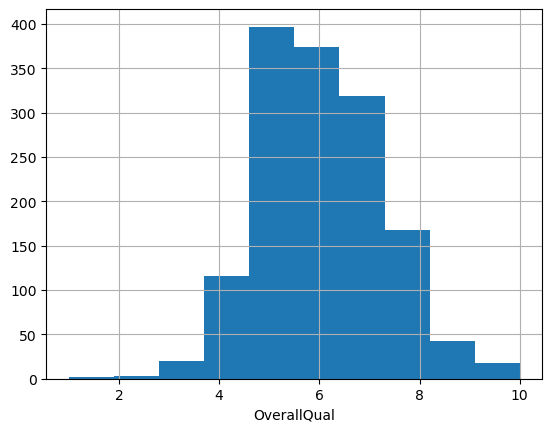

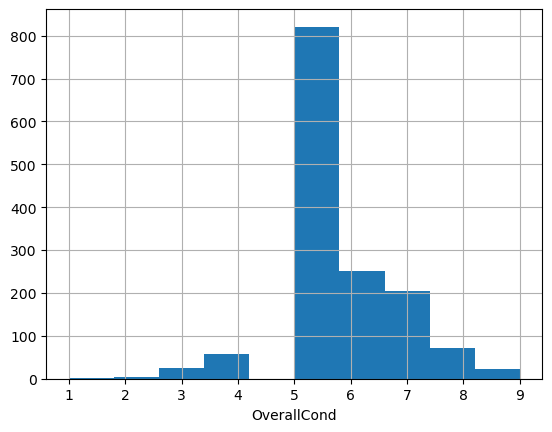

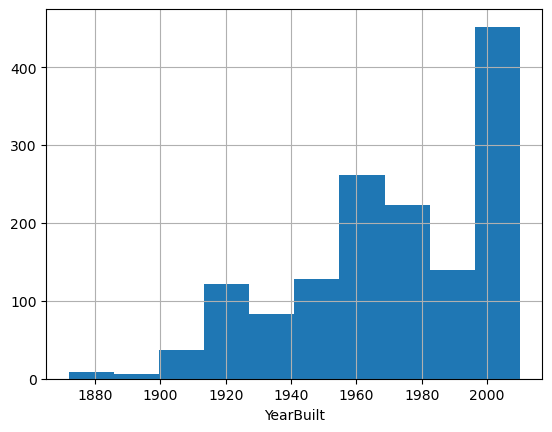

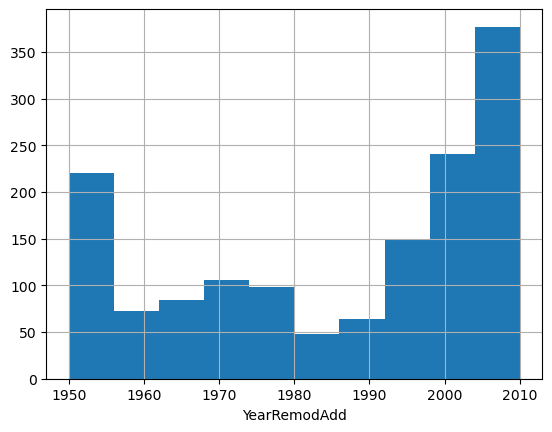

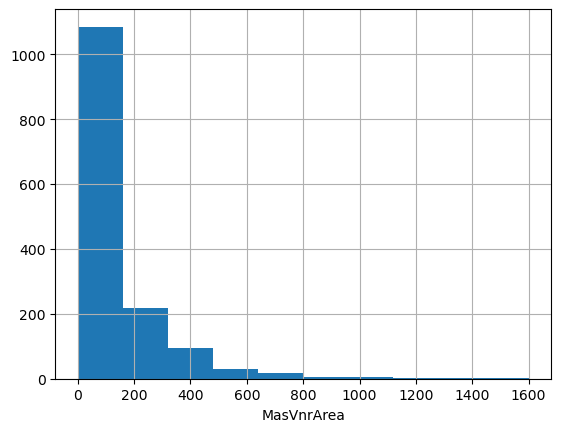

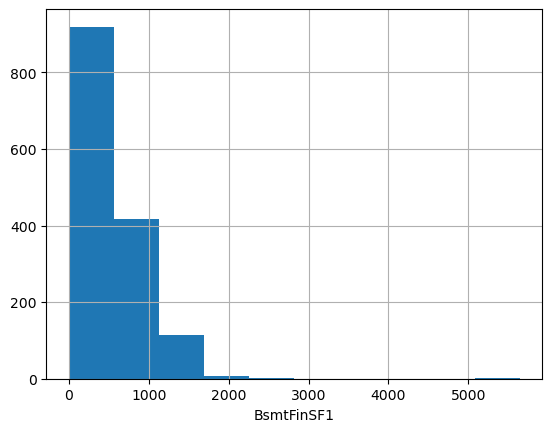

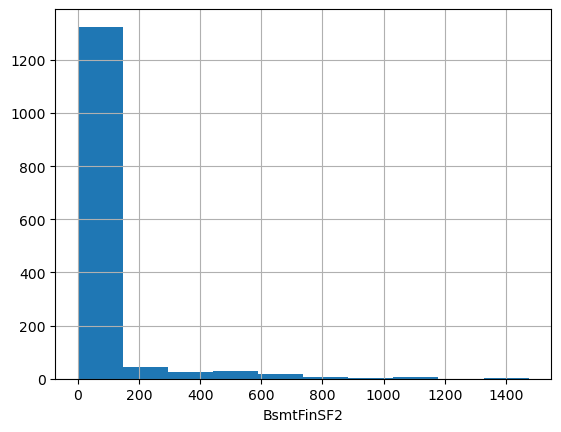

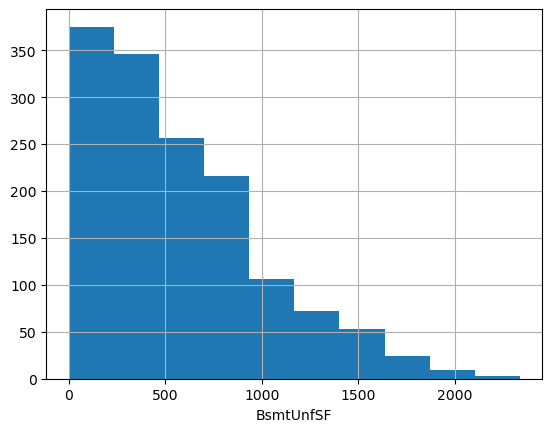

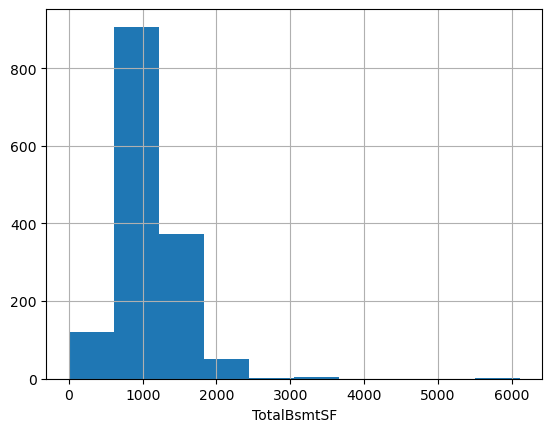

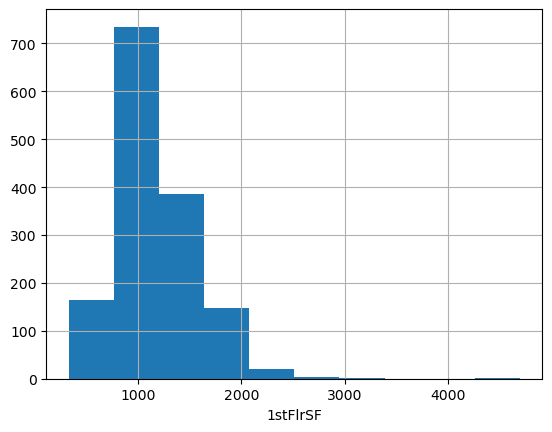

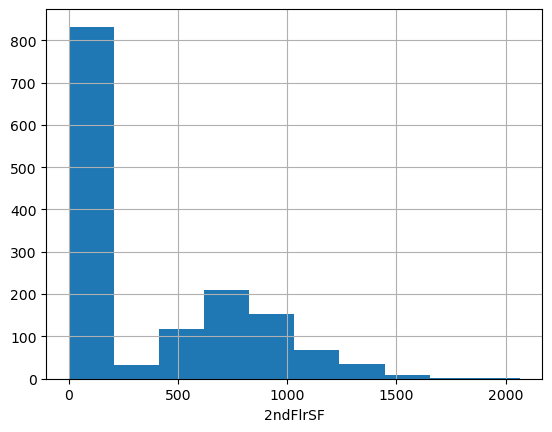

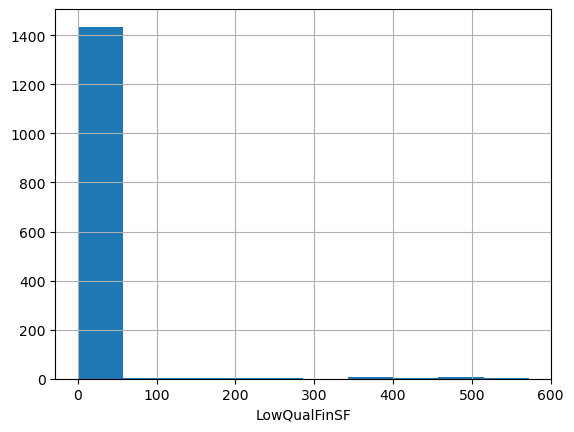

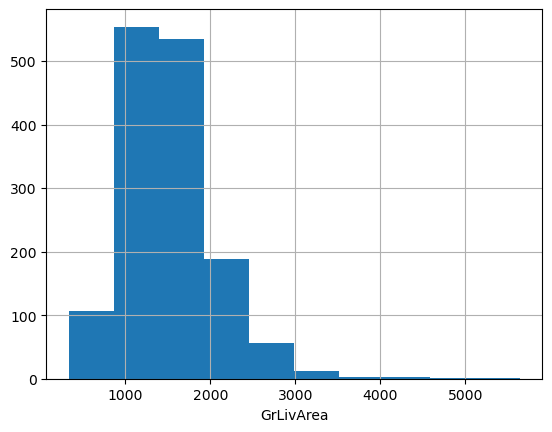

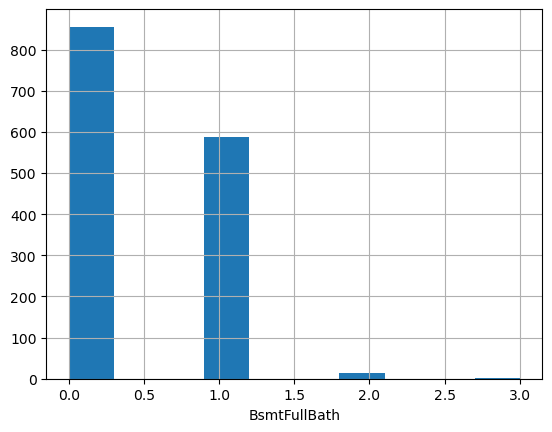

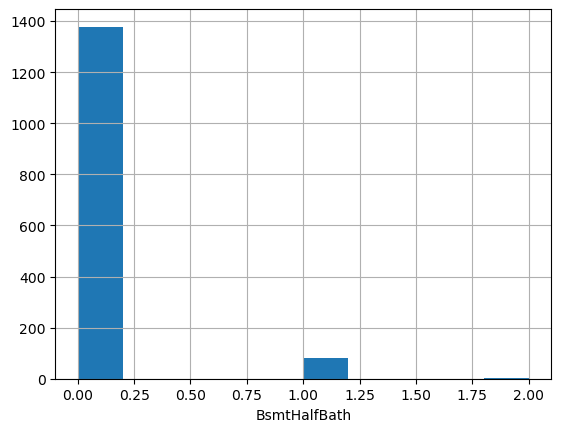

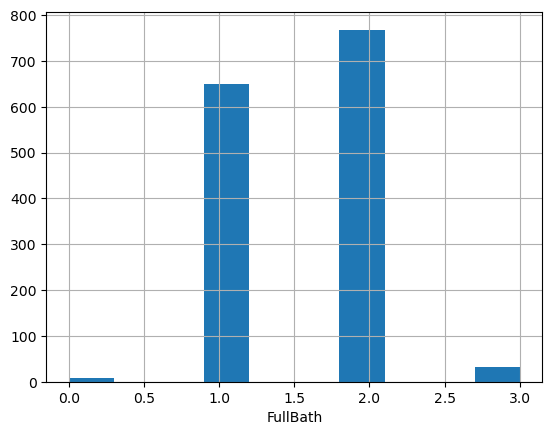

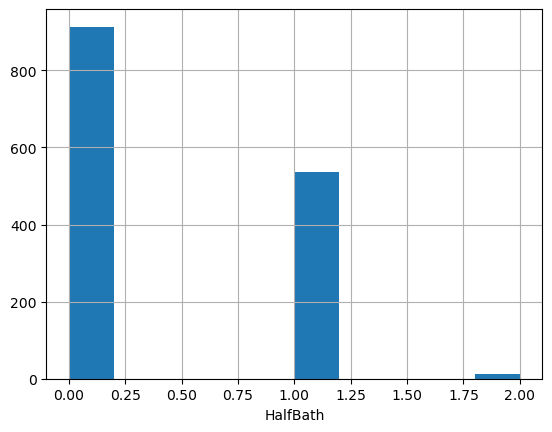

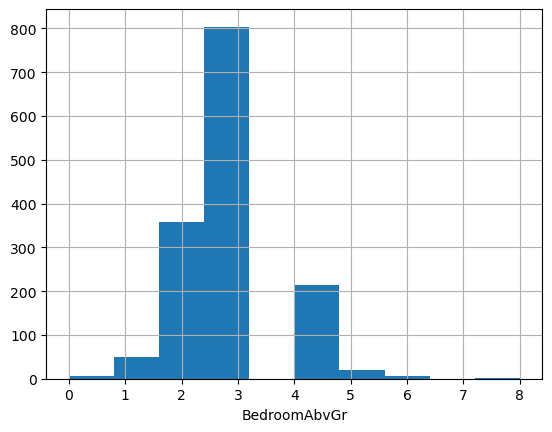

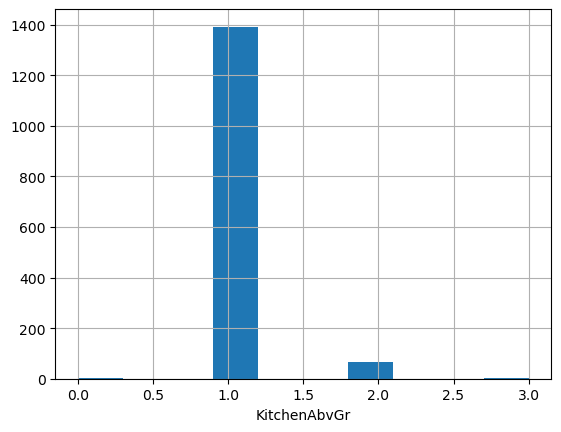

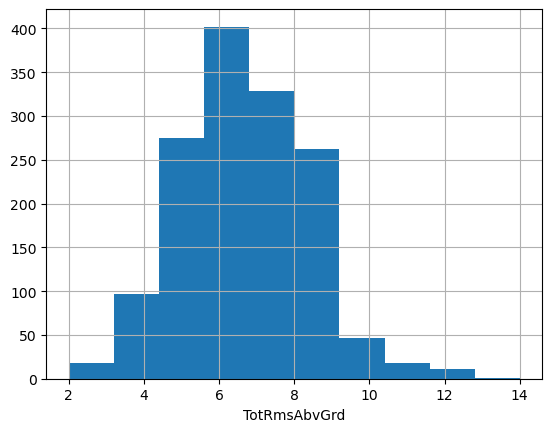

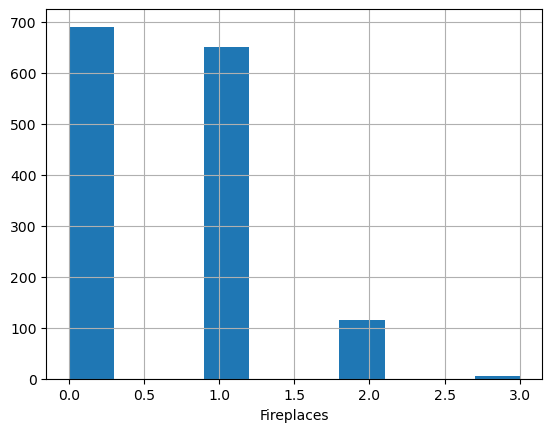

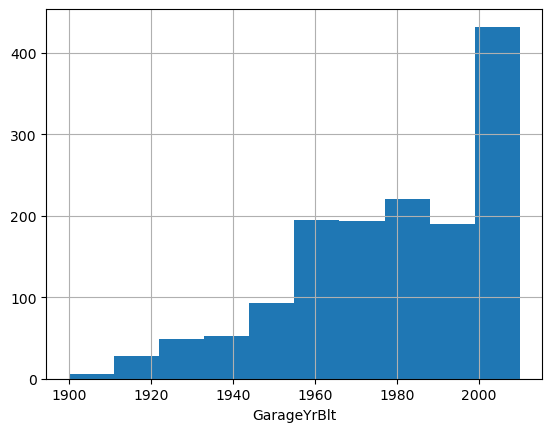

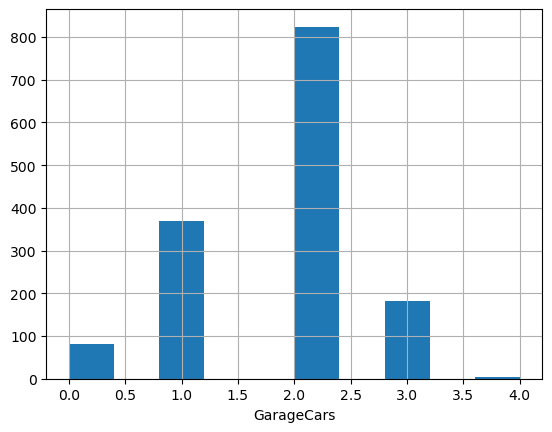

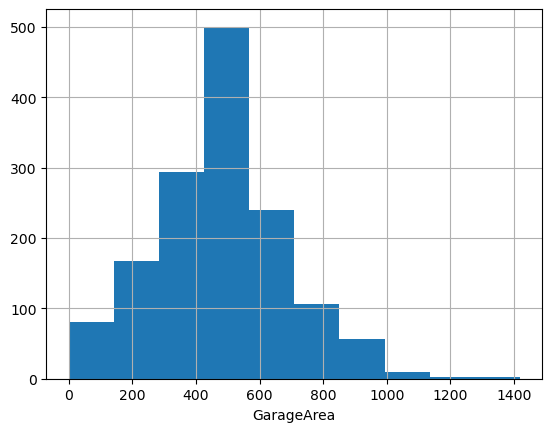

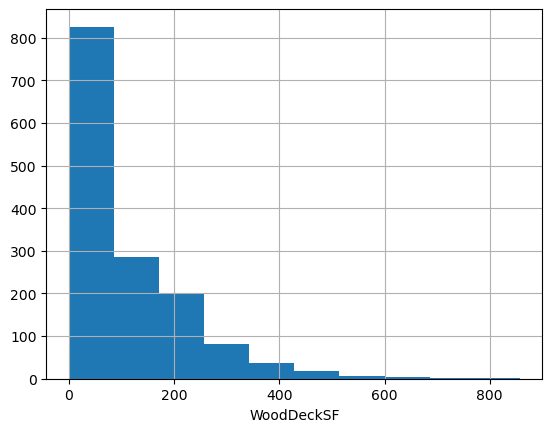

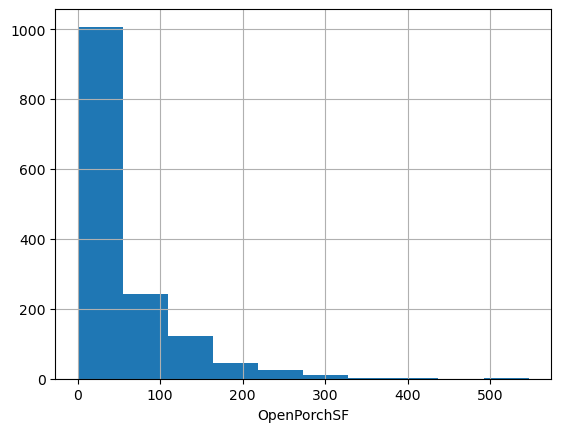

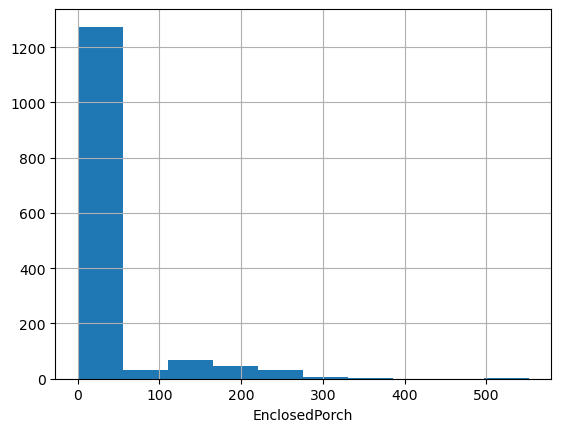

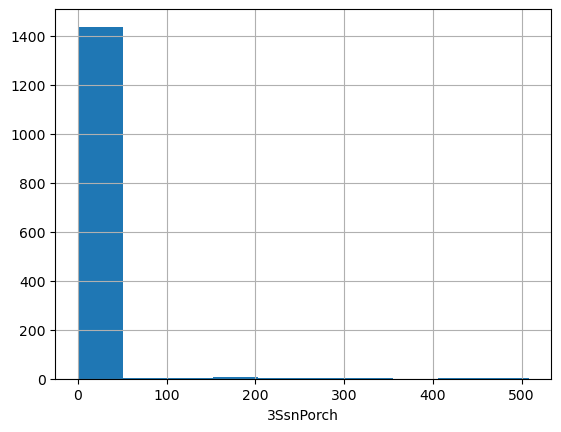

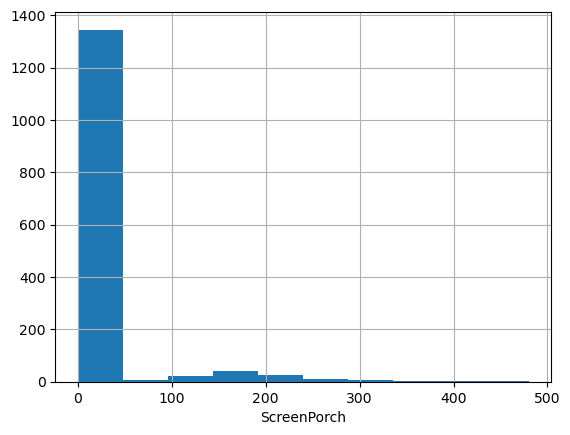

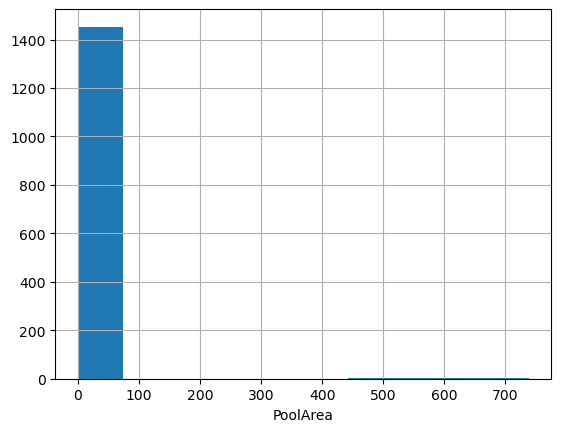

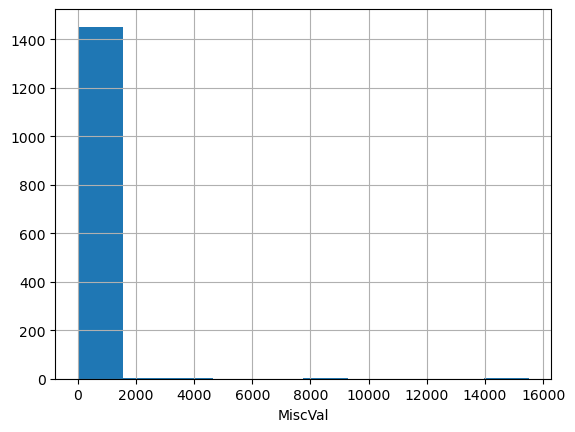

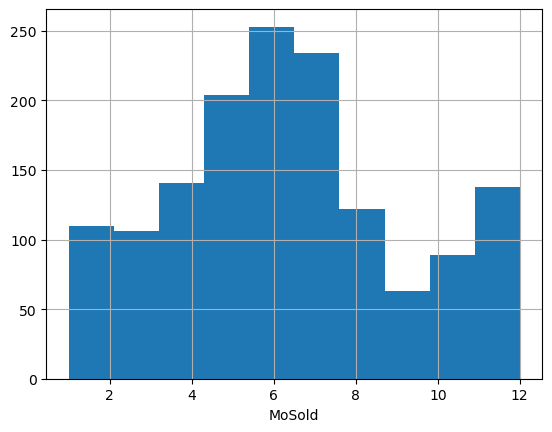

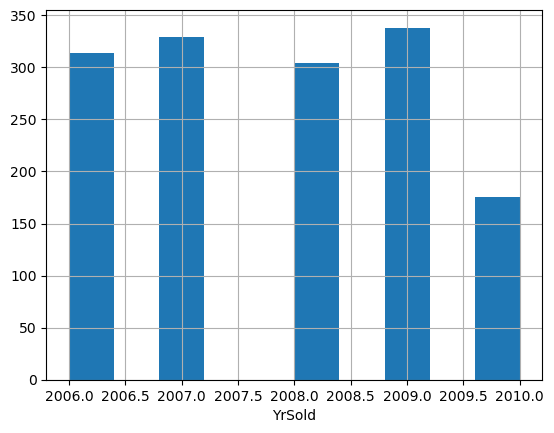

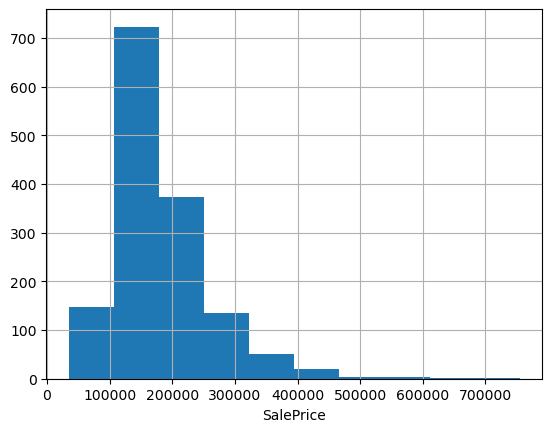

In [16]:
num_columns=[columns for columns in data.columns if data[columns].dtypes!='object']
for columns in num_columns:
  data[columns].hist()
  plt.xlabel(columns)
  plt.show()

The histograms suggest that LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch contain very little variety in values.

In [17]:
data=data.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [18]:
data.shape

(1460, 71)

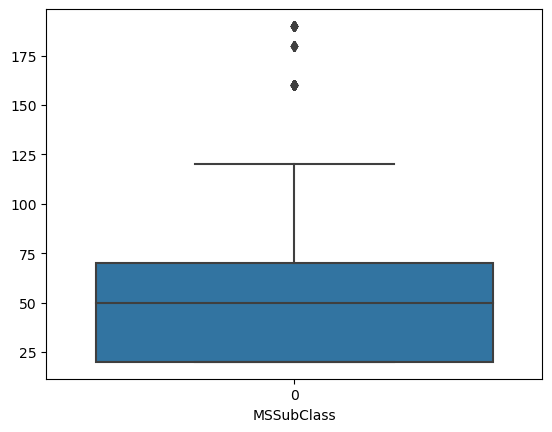

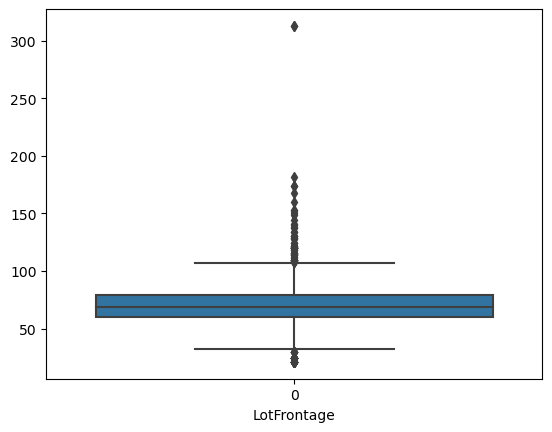

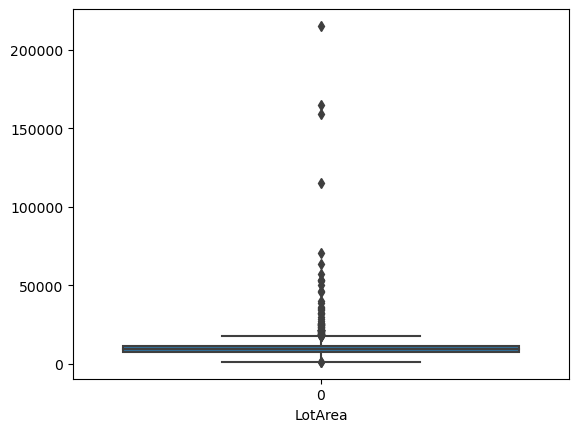

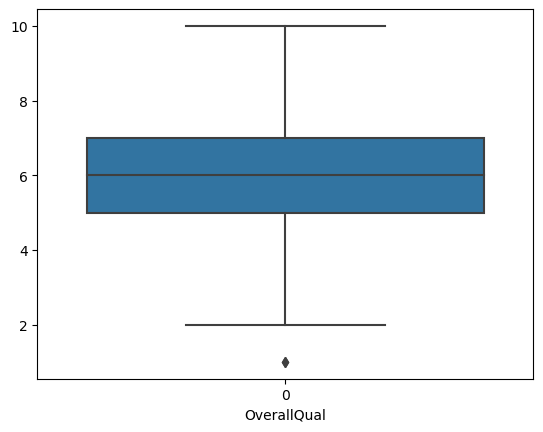

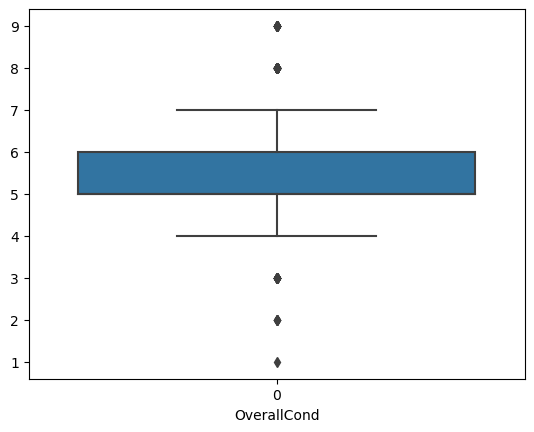

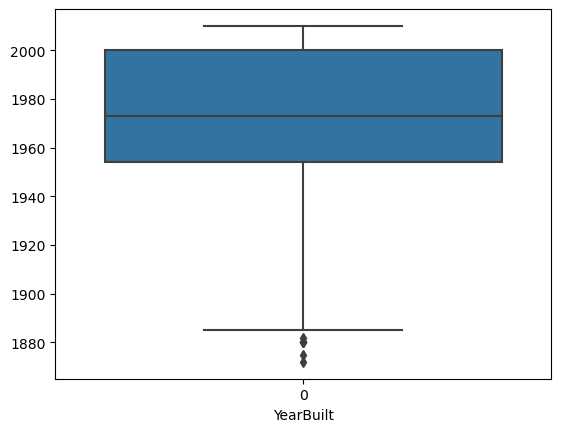

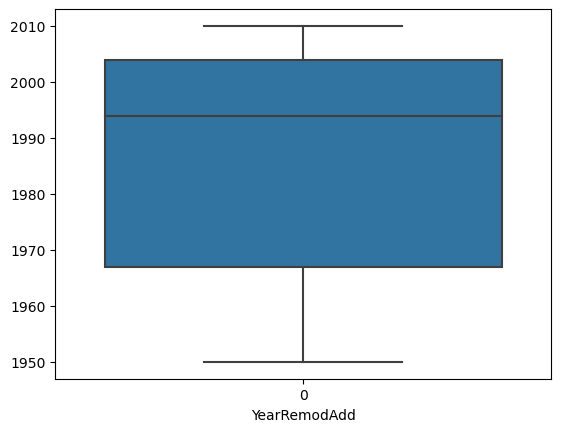

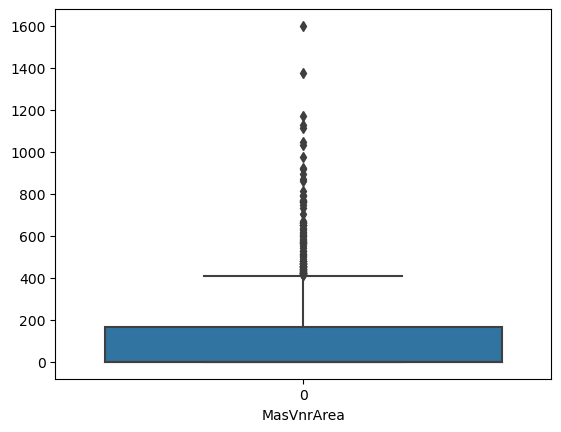

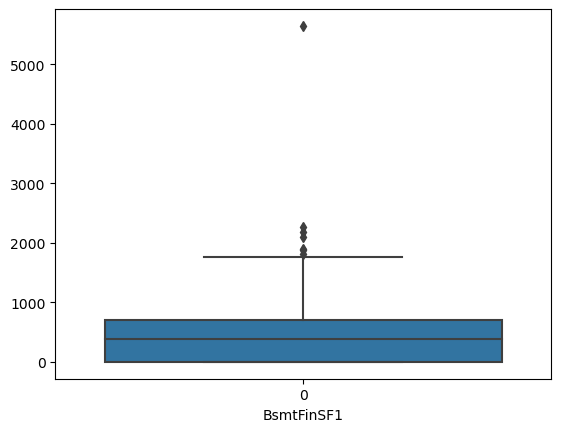

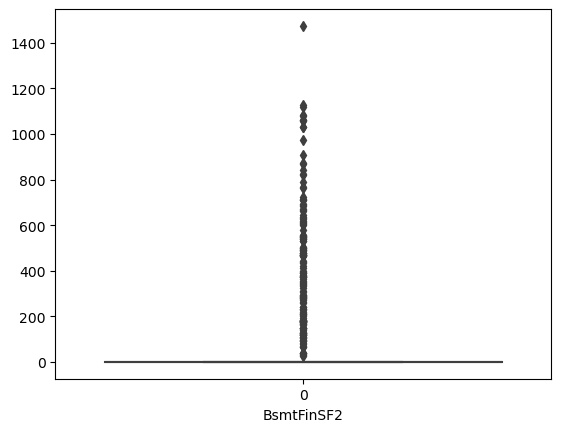

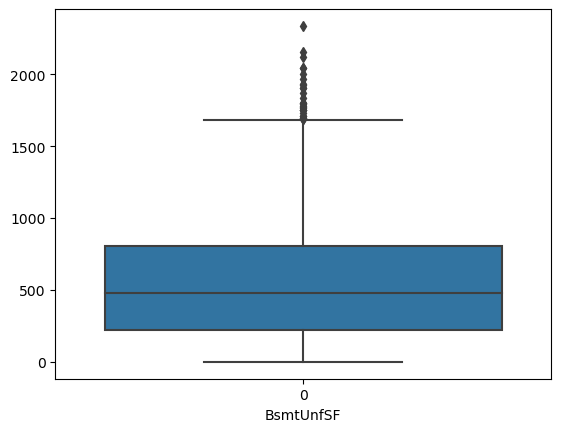

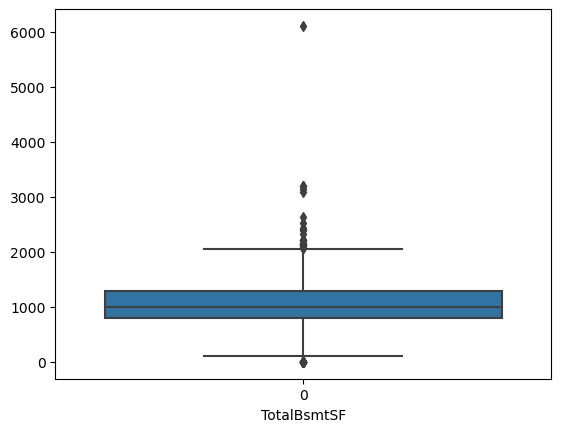

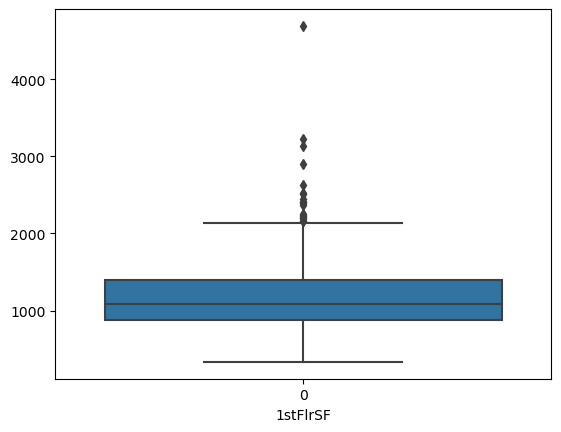

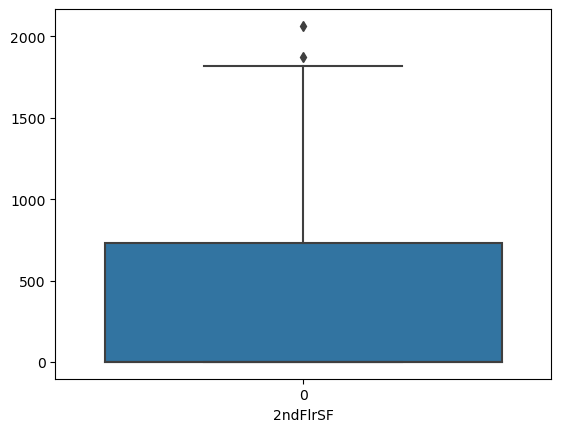

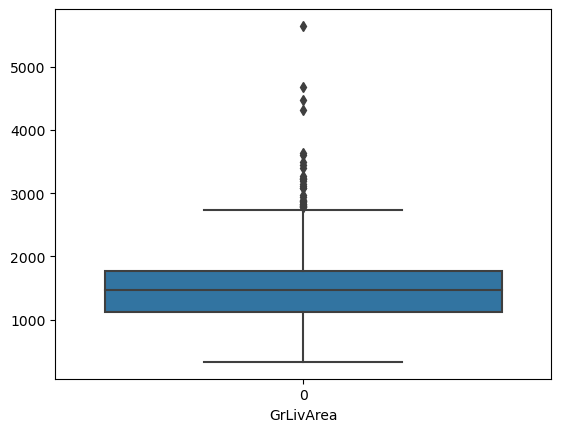

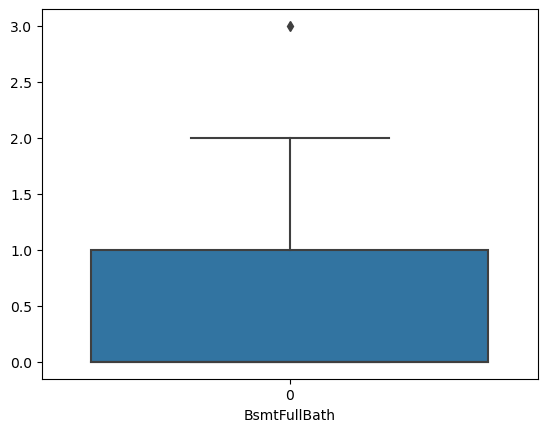

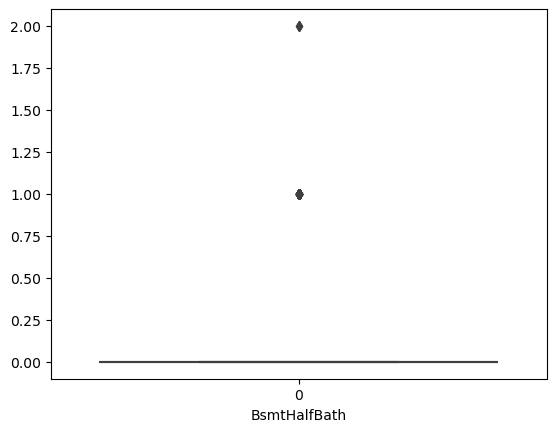

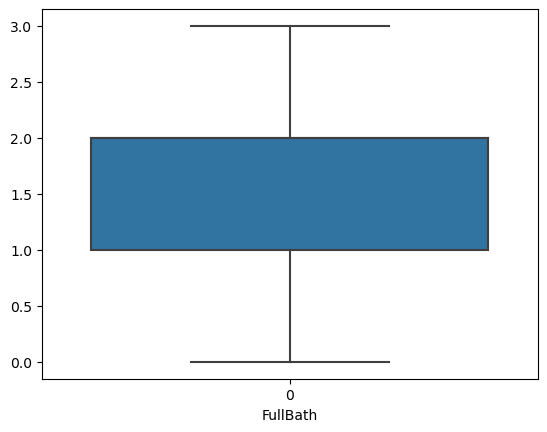

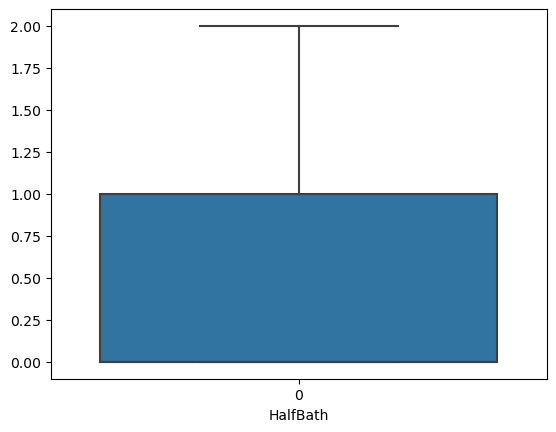

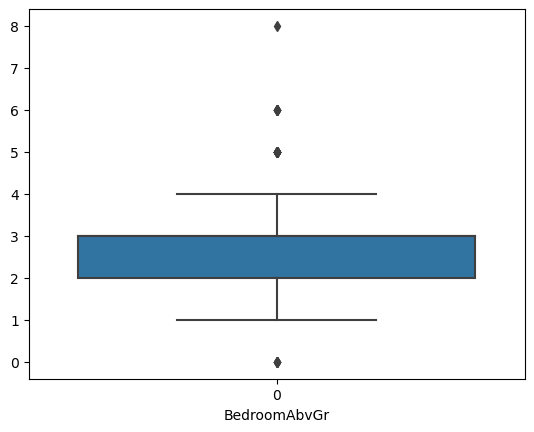

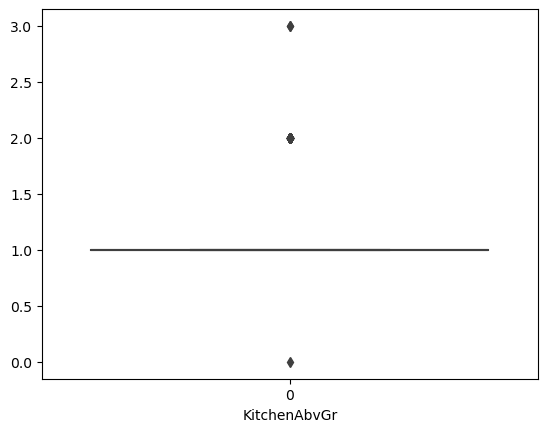

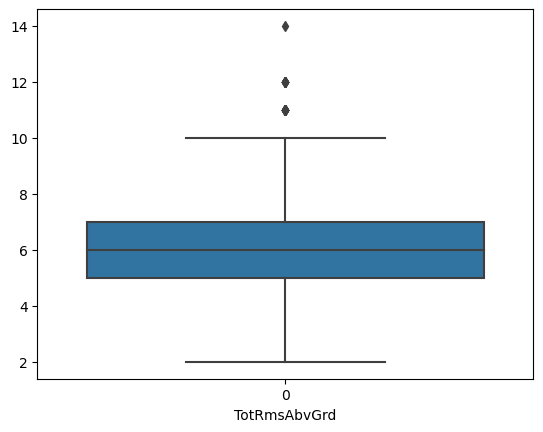

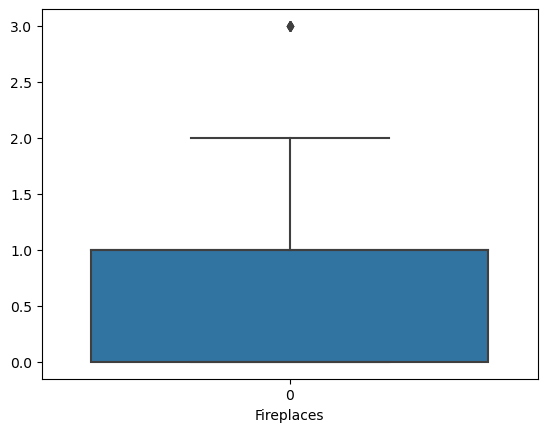

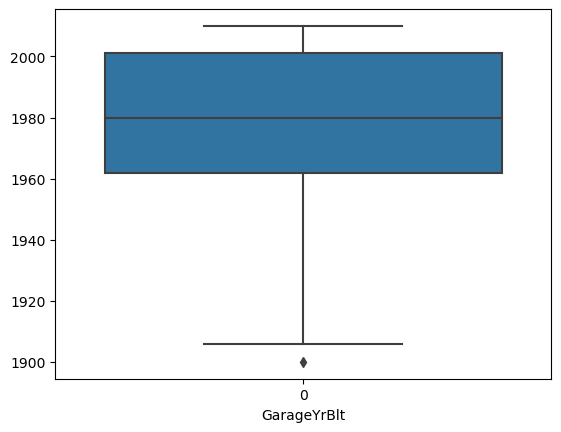

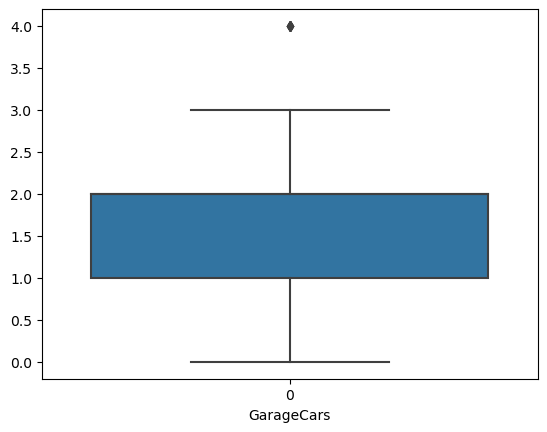

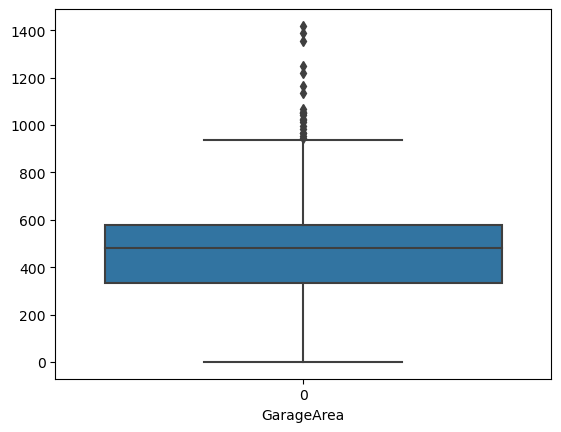

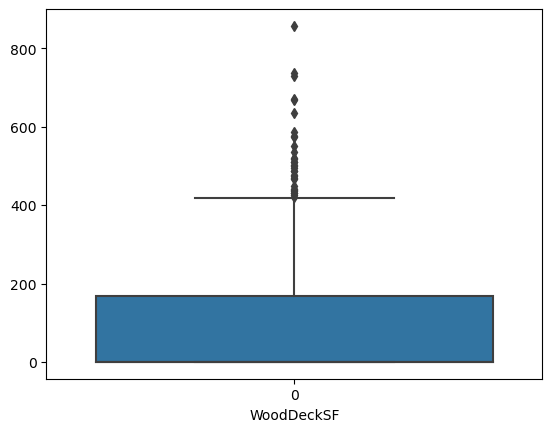

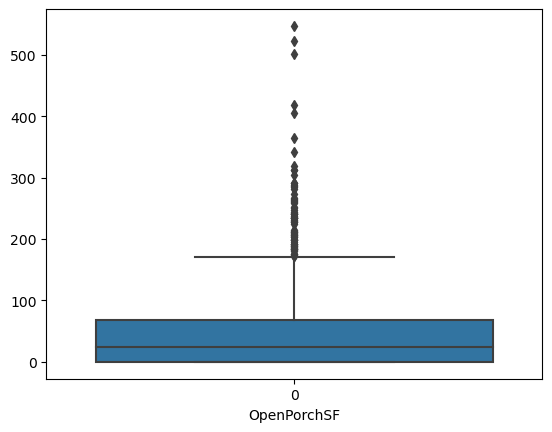

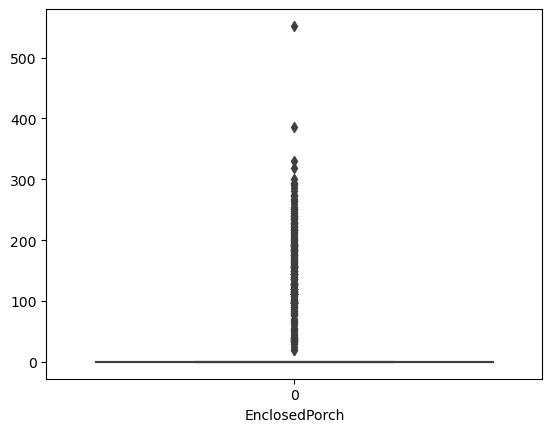

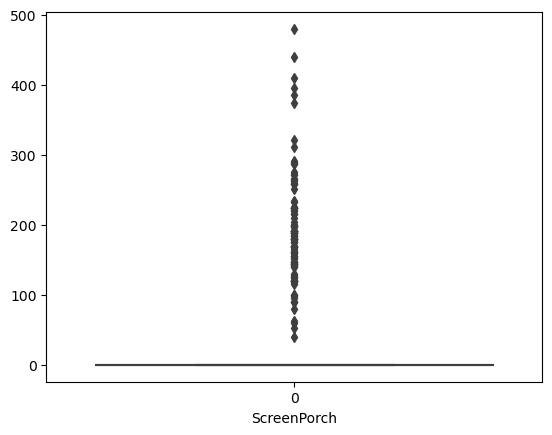

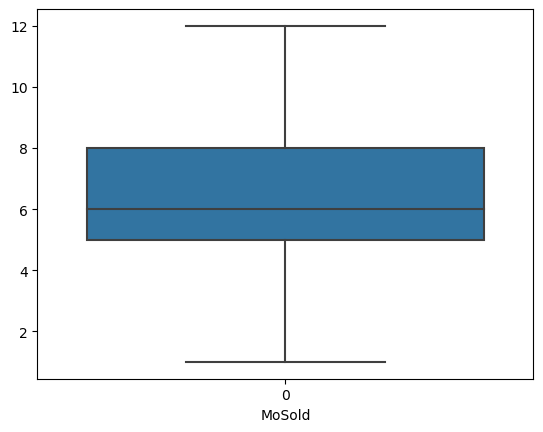

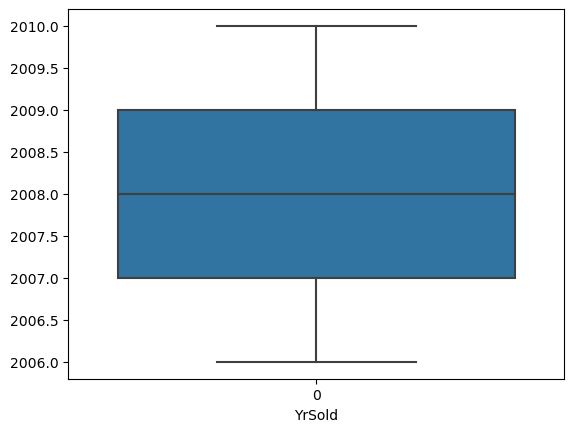

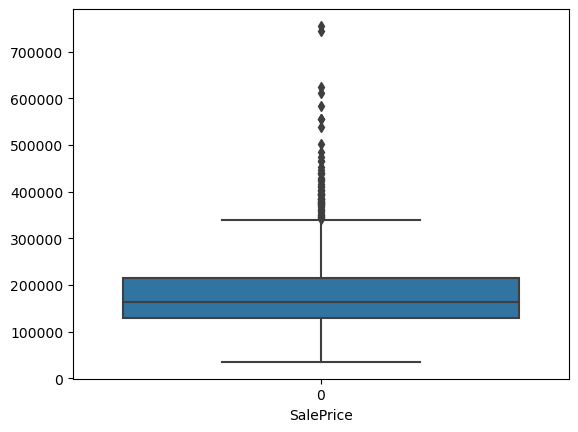

In [19]:
# outlier detection
num_columns=[columns for columns in data.columns if data[columns].dtypes!='object']
for columns in num_columns:
  sns.boxplot(data[columns])
  # data[columns].boxplot()
  plt.xlabel(columns)
  plt.show()

In [20]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']

Q1 = data[cols].quantile(0.05)
Q3 = data[cols].quantile(0.95)
IQR = Q3 - Q1

house = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

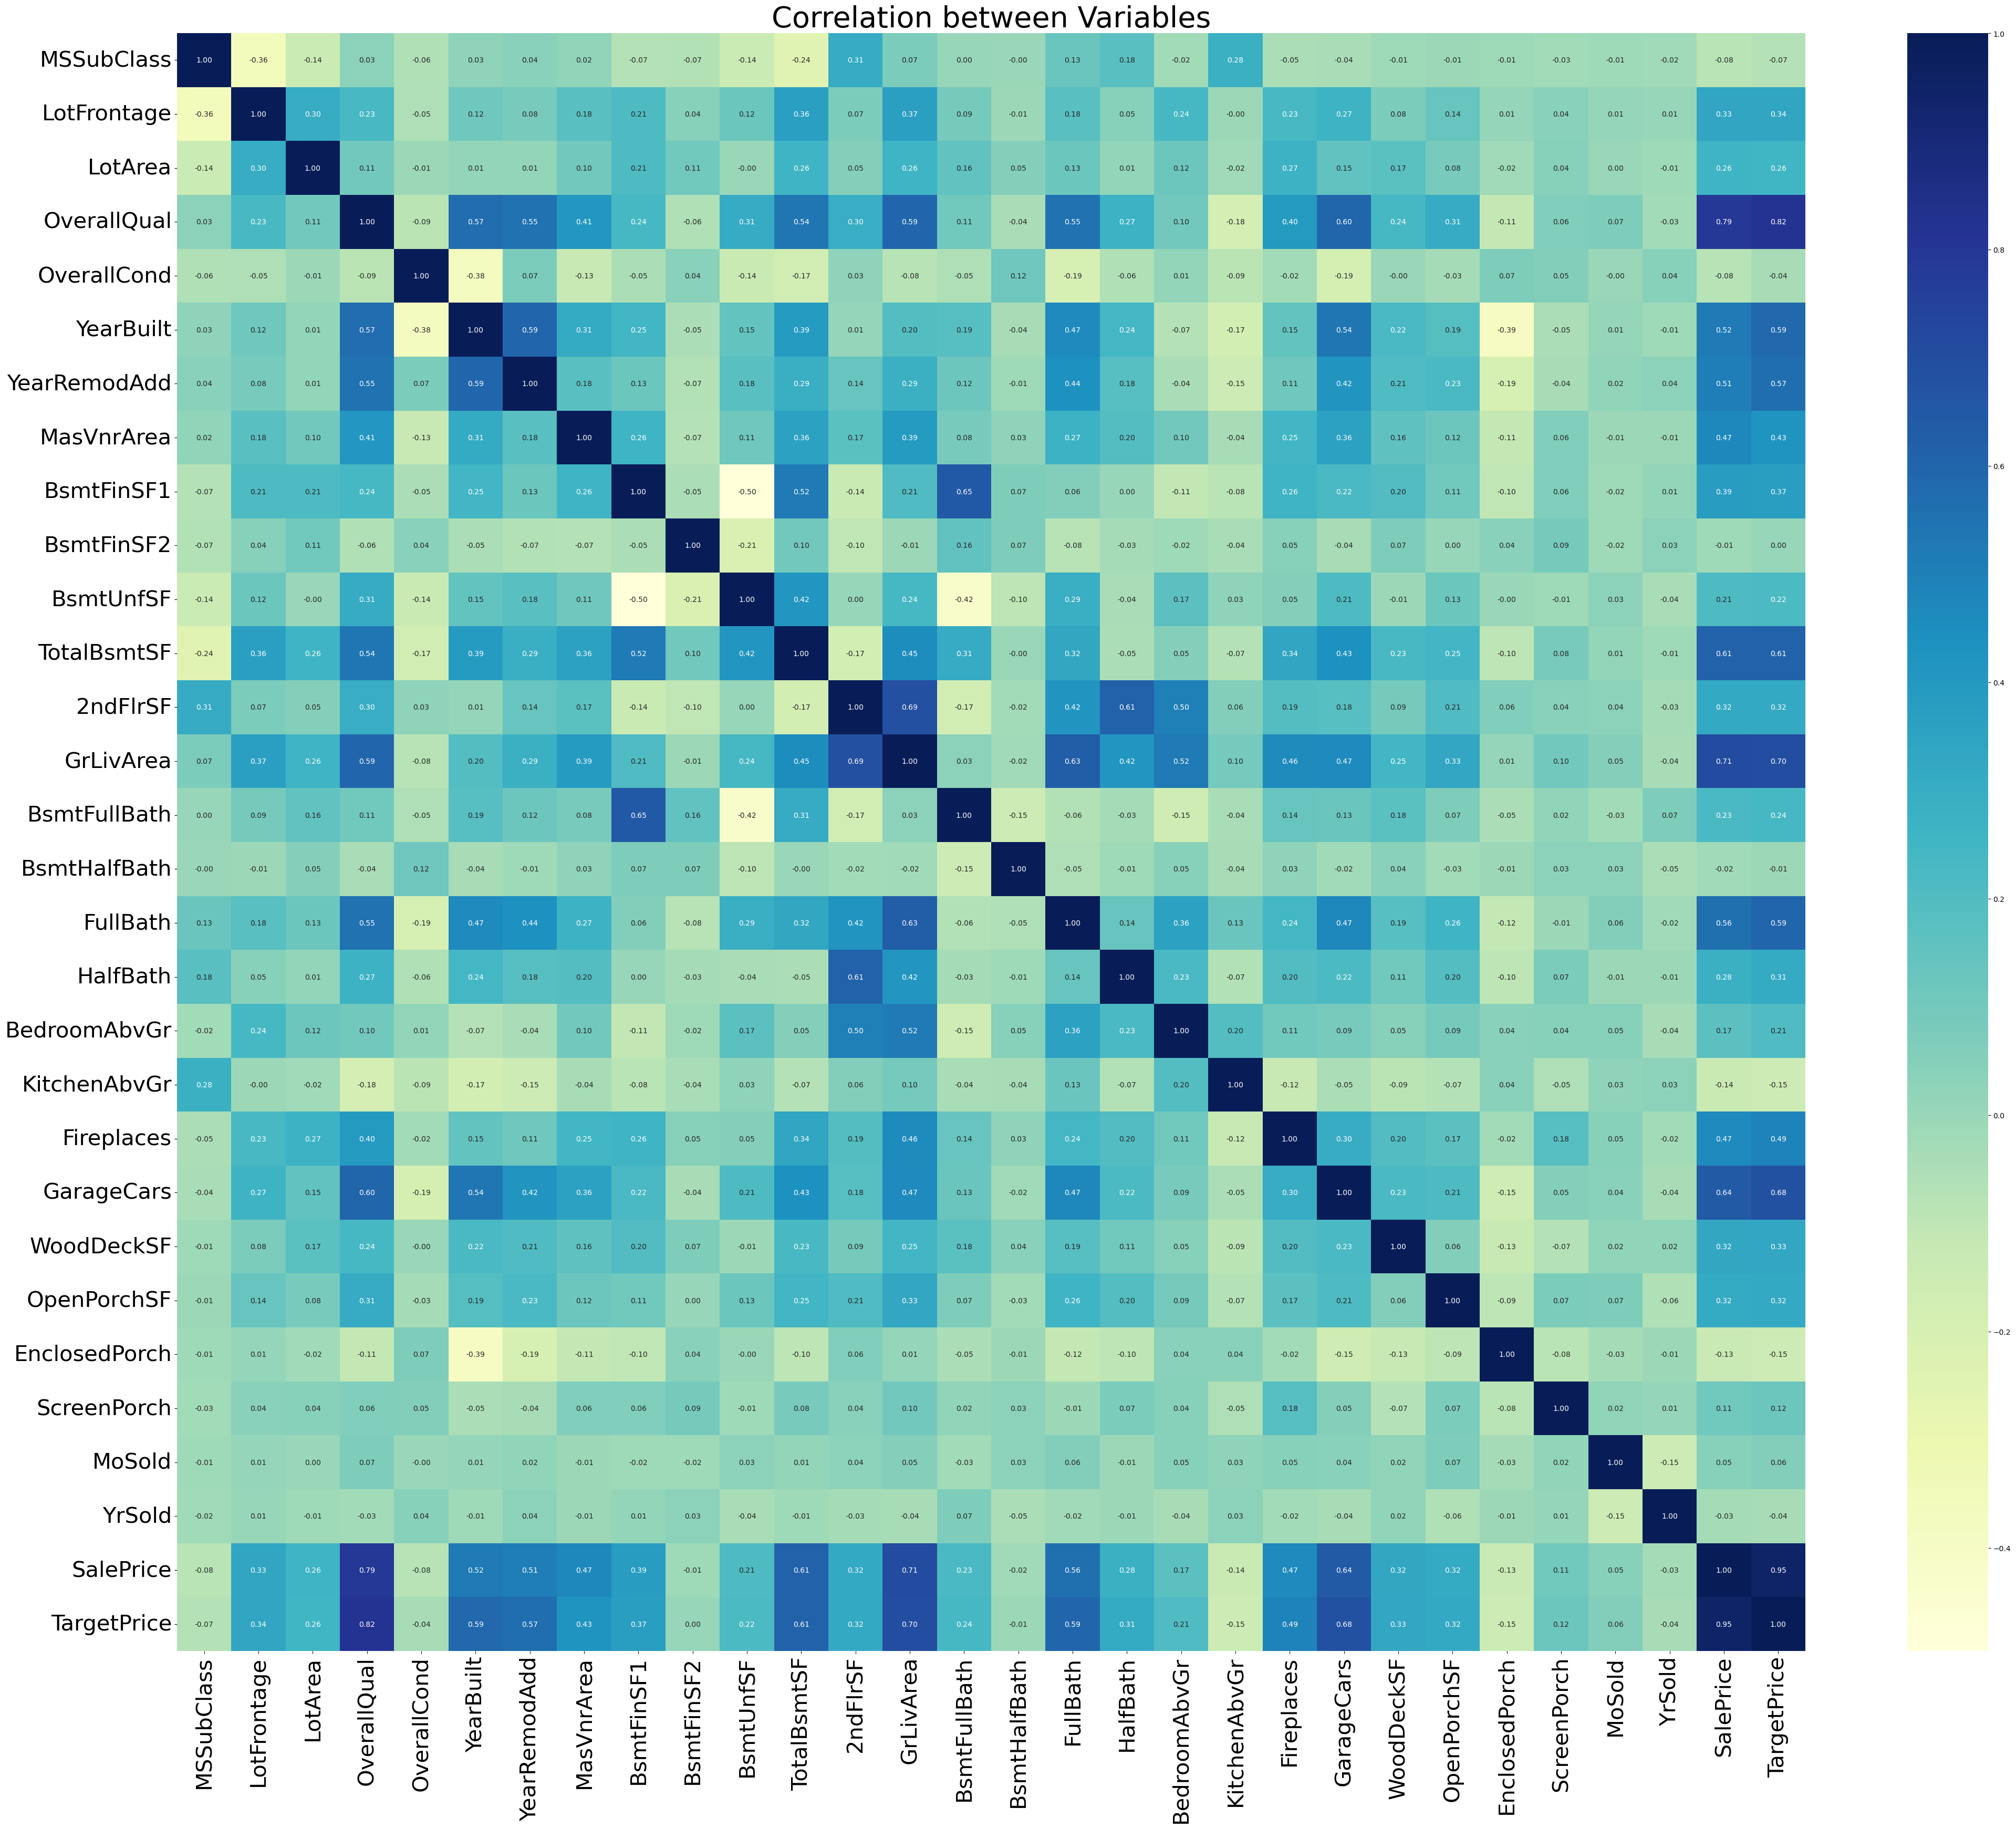

In [47]:
# heatmap
plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


data_num = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data_num.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()


#### Insights from the heatmap:

1.Sale price has a strong positive correlation with OverallQual and GrLivArea.

2.Sale price shows positive correlation with TotalBsmtSF, 1stFlrSF, 

3.FullBath, TotRmsAbvGrd, GarageCars, and GarageArea.

4.Sale price has no strong negative correlation with other variables; 5

5.however, some independent variables exhibit high correlation with each 

6.other, indicating potential multicollinearity.

7.Noteworthy correlations:

8.YearBuilt and GarageYrBlt are highly correlated.

9.TotRmsAbvGrd and GrLivArea exhibit high correlation.

11.10.GarageArea and GarageCars are highly correlated.

12.1stFlrSF and TotalBsmtSF show high correlation.

To address multicollinearity, one of the highly correlated variables is dropped.

In [22]:
data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

### Dealing with categorical variable

In [23]:
data_categorical=data.select_dtypes(include=['object'])
data_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
# data_dummies=pd.get_dummies(data_categorical,dtype=int,drop_first=True)
# data_dummies.head()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data_categorical:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,2,0,61,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,2,298,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,2,0,42,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,2,0,35,272,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,2,192,84,0,0,12,2008,8,4,250000


<Axes: xlabel='SalePrice', ylabel='Density'>

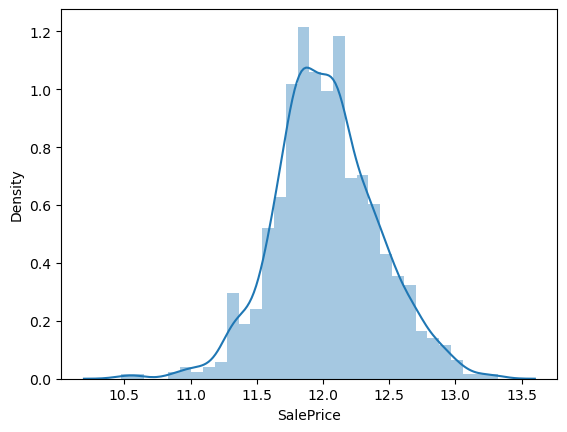

In [25]:
# log transformation of target feature 
sns.distplot(np.log(house["SalePrice"]))

In [26]:
data["TargetPrice"] = np.log(data["SalePrice"])

# Model Building

In [27]:
data.shape

(1460, 68)

In [28]:
x = data.drop(["TargetPrice"], axis=1)
y = data["TargetPrice"]

In [29]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size = 0.3, random_state=100)

#### Ridge regrssion

In [30]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [32]:
# Applying Ridge
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-0.05895313273148247


In [34]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.19380364e-04, -1.32394248e-02, -6.97787946e-05,  3.44505220e-07,
        1.06372823e-01, -3.25732144e-03,  4.99932341e-05,  9.84375929e-03,
        2.33668435e-04,  2.22825573e-02,  1.08643435e-04,  3.33258372e-03,
       -8.71628736e-03, -1.12163444e-03,  2.50119789e-05,  3.33168627e-02,
        2.53234402e-02,  8.36875686e-04,  5.19094031e-04,  6.65877243e-04,
       -2.61863333e-03,  9.80065222e-05,  2.60681274e-03,  1.49825396e-04,
       -6.84049044e-05,  2.74777283e-02,  6.07920784e-03,  1.12718609e-02,
        9.76024801e-03, -2.62754801e-04,  3.77085348e-03, -7.29836711e-03,
       -2.22952269e-05,  5.00580377e-03,  2.62732803e-05,  1.01203861e-05,
        1.48436497e-05,  1.07156740e-03, -5.75454565e-03,  6.43142867e-02,
        2.65873213e-03, -4.32136159e-05,  4.99200399e-05,  3.67033578e-02,
        1.01287305e-02,  2.51993037e-02,  2.01562662e-02,  2.63167515e-02,
        1.72538182e-03,  9.53996996e-03,  3.96610944e-04,  1.90602576e-02,
       -4.87923287e-03, -

In [35]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.19380364e-04, -1.32394248e-02, -6.97787946e-05,  3.44505220e-07,
        1.06372823e-01, -3.25732144e-03,  4.99932341e-05,  9.84375929e-03,
        2.33668435e-04,  2.22825573e-02,  1.08643435e-04,  3.33258372e-03,
       -8.71628736e-03, -1.12163444e-03,  2.50119789e-05,  3.33168627e-02,
        2.53234402e-02,  8.36875686e-04,  5.19094031e-04,  6.65877243e-04,
       -2.61863333e-03,  9.80065222e-05,  2.60681274e-03,  1.49825396e-04,
       -6.84049044e-05,  2.74777283e-02,  6.07920784e-03,  1.12718609e-02,
        9.76024801e-03, -2.62754801e-04,  3.77085348e-03, -7.29836711e-03,
       -2.22952269e-05,  5.00580377e-03,  2.62732803e-05,  1.01203861e-05,
        1.48436497e-05,  1.07156740e-03, -5.75454565e-03,  6.43142867e-02,
        2.65873213e-03, -4.32136159e-05,  4.99200399e-05,  3.67033578e-02,
        1.01287305e-02,  2.51993037e-02,  2.01562662e-02,  2.63167515e-02,
        1.72538182e-03,  9.53996996e-03,  3.96610944e-04,  1.90602576e-02,
       -4.87923287e-03, -

In [36]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9540132405172097
0.9489882416203799
7.380518145475923
3.6763445326196473
0.007228715127792286
0.008393480668081387


#### Lasso

In [37]:
# lasso
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.05928494162173285


In [39]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [40]:
lasso.coef_

array([ 1.11432846e-04, -1.27403275e-02, -7.25937056e-05,  3.33193507e-07,
        7.70432706e-02, -3.23988446e-03,  0.00000000e+00,  0.00000000e+00,
        2.17175925e-04,  1.94921792e-02,  1.07527031e-04,  2.87484190e-03,
       -7.32585815e-03, -8.39032089e-04,  1.06897608e-04,  3.29807445e-02,
        2.51130988e-02,  8.49744324e-04,  5.34805874e-04,  3.38891526e-04,
       -2.17057075e-03,  0.00000000e+00,  2.63311180e-03,  0.00000000e+00,
       -6.87737239e-05,  2.77526875e-02,  5.94016410e-03,  1.07996988e-02,
        9.50358822e-03, -0.00000000e+00,  3.77360564e-03, -7.31781550e-03,
       -1.57015606e-05,  4.79953349e-03,  3.12140875e-05,  1.56713152e-05,
        8.90769470e-06,  0.00000000e+00, -5.83063780e-03,  6.26172374e-02,
        2.66469480e-03, -4.27724330e-05,  5.10696575e-05,  3.51971172e-02,
        8.00963212e-03,  2.41896012e-02,  1.92665269e-02,  2.61891535e-02,
        0.00000000e+00,  9.36927273e-03,  3.10165273e-04,  1.88922843e-02,
       -4.88155241e-03, -

In [41]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9539813195517022
0.949020600390167
7.385641212806602
3.6740124823204994
0.007233732823512833
0.008388156352329907


In [42]:
metrics_names = ['R2 score(train)', 'R2 score(test)', 'RSS(Train)', 'RSS(Test)', 'MSE(Train)', 'MSE(Test)']

rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric3, name='Lasso Regression')

# Creating a DataFrame for Ridge and Lasso metrics
final_metric = pd.concat([rg_metric, ls_metric], axis=1)
final_metric['Metric'] = metrics_names

# Reordering the columns
final_metric = final_metric[['Metric', 'Ridge Regression', 'Lasso Regression']]

# Display the final metric DataFrame
print(final_metric)

            Metric  Ridge Regression  Lasso Regression
0  R2 score(train)          0.954013          0.953981
1   R2 score(test)          0.948988          0.949021
2       RSS(Train)          7.380518          7.385641
3        RSS(Test)          3.676345          3.674012
4       MSE(Train)          0.085022          0.085051
5        MSE(Test)          0.091616          0.091587


#### Coefficients

In [43]:
betas=pd.DataFrame(index=x.columns)

In [44]:
betas.rows=x.columns

In [45]:
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_

In [46]:
pd.set_option('display.max_rows',None)
betas.head(100)

,Ridge,Lasso
MSSubClass,1.193804e-04,1.114328e-04
MSZoning,-1.323942e-02,-1.274033e-02
LotFrontage,-6.977879e-05,-7.259371e-05
LotArea,3.445052e-07,3.331935e-07
Street,1.063728e-01,7.704327e-02
LotShape,-3.257321e-03,-3.239884e-03
LandContour,4.999323e-05,0.000000e+00
Utilities,9.843759e-03,0.000000e+00
LotConfig,2.336684e-04,2.171759e-04
LandSlope,2.228256e-02,1.949218e-02


The significance of variables in predicting house prices can be assessed based on the magnitude of their coefficients in the Ridge and Lasso Regression models. Larger absolute values of coefficients indicate more significant predictors.

From the provided Ridge and Lasso coefficients:

**Ridge Regression:**

Variables with larger absolute values, such as OverallQual, GrLivArea, GarageCars, and TotalBsmtSF, are more significant in predicting house prices.
Positive coefficients indicate a positive relationship with house prices, while negative coefficients suggest a negative relationship.

**Lasso Regression:**

Similar to Ridge, variables like OverallQual, GrLivArea, GarageCars, and TotalBsmtSF appear significant.
Lasso tends to set some coefficients exactly to zero, indicating variable selection. Variables with non-zero coefficients are still considered significant.
Interpretation:

OverallQual: Overall quality of the house has a significant positive impact on the price.
GrLivArea: Above-ground living area square footage is positively correlated with house prices.
GarageCars: Number of cars that fit in the garage is positively associated with house prices.
TotalBsmtSF: Total basement square footage is positively related to house prices.
Model Performance:

The overall predictive performance of these variables can be assessed using metrics like R2 score, Mean Squared Error (MSE), and Residual Sum of Squares (RSS). Lower MSE and RSS and higher R2 score indicate better model performance.
It's crucial to note that these interpretations are based on the provided coefficients, and the actual impact may vary based on the dataset. Further validation and exploration, such as cross-validation and assessing model residuals, would enhance the understanding of the model's predictive ability.